In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from tqdm import tqdm
import os
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# Define the colors for the colormap: red (1, 0, 0), purple (0.5, 0, 0.5), blue (0, 0, 1)
colors = [(0.8, 0, 0), (0.7, 0.7, 0), (0, 0, 0.8)]
#colors = [(0, 0, 0.8), (0.5, 0, 0.5), (0.8, 0, 0)]

# Number of colors in the colormap
n_colors = 10

# Create the colormap
blue_yellow_red_cmap = LinearSegmentedColormap.from_list("red_purpel_blue", colors, N=n_colors)

# Create an array of colors from red to blue via purple
color_array = blue_yellow_red_cmap(np.linspace(0, 1, n_colors))

In [4]:
time = []
number_of_steps = 30000
timeStep = 1.96*10**(-4) 

specific_point = timeStep*number_of_steps
step_size = timeStep
time_step_array =  np.arange(0, specific_point, step_size)
time.append(time_step_array)

In [5]:
file_path = 'Diameter_scan_array.txt'
loaded_array= np.loadtxt(file_path, delimiter=',')

len(loaded_array[1])
specific_point = timeStep*(number_of_steps)
step_size = timeStep
time_step_array =  np.arange(0, specific_point, step_size)
time.append(time_step_array)

# Nano seconds
time_step_array = [element * 100 for element in time_step_array]
len(time_step_array)

30000

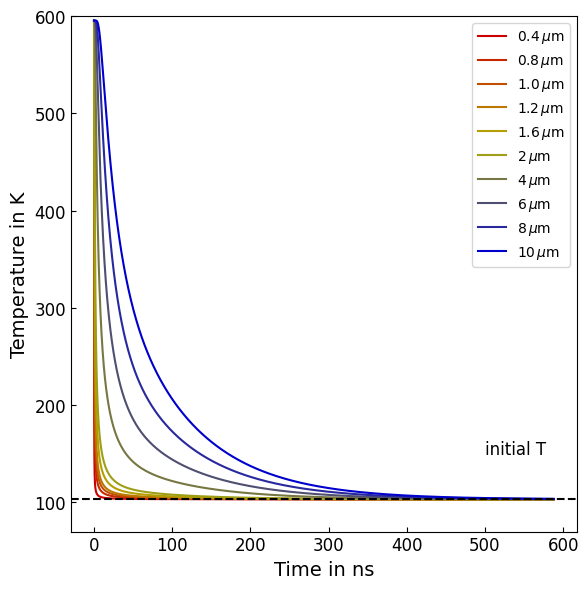

In [25]:
#Plot the Result
plt.figure(figsize=(6,6))
plt.minorticks_on
plt.xlabel(r'Time in ns', fontsize="14")
plt.ylabel(r"Temperature in K", fontsize="14")

# Diameter
label_arr = [r'$0.4 \, \mu$m', r'$0.8 \, \mu$m', r'$1.0 \, \mu$m', r'$1.2 \, \mu$m', r'$1.6 \, \mu$m', r'$2 \, \mu$m', r'$4 \, \mu$m', r'$6 \, \mu$m',  r'$8 \, \mu$m', r'$10 \, \mu$m']

for i in range(len(loaded_array)):
    plt.plot(time_step_array, loaded_array[i], color= color_array [i], label = label_arr[i] )
    plt.legend(loc="upper right")

# Show line where the CDW Spots arge gone
plt.axhline(y=103.15, color='black', linestyle='--')
plt.text(500, 150, 'initial T', color='black', backgroundcolor='white', fontsize = 12)

plt.ylim(70, 600)

#Set the ricks direction inwards
plt.tick_params(axis='both', which='major', direction='in')
plt.tick_params(axis='both', which='minor', direction='in')

plt.tick_params(axis='both', labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xscale('log')
#plt.yscale('log')

plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig(r'P:\Heat Transfer\Final_plots' + '/' + "Diameter_scan.pdf")
plt.show()

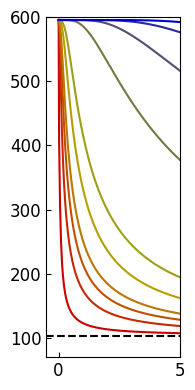

In [19]:
#Plot the Result
plt.figure(figsize=(2,4))
plt.minorticks_on
#plt.xlabel(r'Time in x100 ns', fontsize="14")
#plt.ylabel(r"Temperature in K", fontsize="14")

for i in range(len(loaded_array)):
    plt.plot(time_step_array, loaded_array[i], color= color_array [i])

# Show line where the CDW Spots arge gone
plt.axhline(y=103.15, color='black', linestyle='--', label='origin temperature')
plt.ylim(70, 600)
plt.xlim(-0.5,5)
#plt.xscale('log')

#Set the ricks direction inwards
plt.tick_params(axis='both', which='major', direction='in')
plt.tick_params(axis='both', which='minor', direction='in')

plt.tick_params(axis='both', labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig(r'P:\Heat Transfer\Final_plots' + '/' + "Diameter_scan_zoom.pdf")
plt.show()

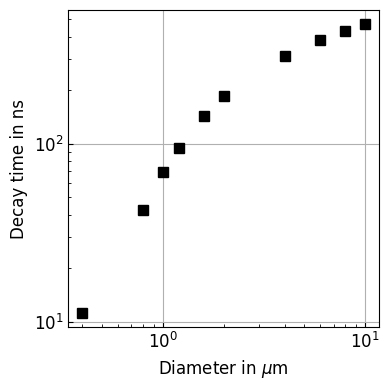

In [21]:
from scipy.optimize import curve_fit

# Funktion für den Fit
def fit_func(x, a, b):
    return a * x + b

initial_temp = []
for i in range(len(loaded_array)):
    for j in range(len(loaded_array[i])):
        if loaded_array[i][j] <= 105:
            initial_temp.append(j)
            break
decay_time = []
for i in initial_temp:
    decay_time.append(i*timeStep*100)

decay_time

diameter_array = [0.4,0.8,1.0,1.2,1.6,2,4,6,8,10]

diamter_fit_array = [0.4,0.8,1.0,1.2,1.6,2]
decay_time_fit = decay_time[:6]

# Convert lists to numpy arrays for curve fitting
diameter_fit = np.array(diamter_fit_array)
decay_time_fit = np.array(decay_time_fit)

# Fit the curve
params, covariance = curve_fit(fit_func, diameter_fit, decay_time_fit)



#Plot the Result
plt.figure(figsize=(4,4))
plt.minorticks_on()
plt.xlabel(r'Diameter in $\mu$m', fontsize="12")
plt.ylabel(r"Decay time in ns", fontsize="12")


plt.errorbar(diameter_array, decay_time, fmt= "s", markersize=7, linewidth=1, color="black")

#Set the ricks direction inwards
plt.tick_params(axis='both', which='major', direction='in')
plt.tick_params(axis='both', which='minor', direction='in')

plt.xscale('log')
plt.yscale('log')
plt.grid("on")

plt.tick_params(axis='both', labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig(r'P:\Heat Transfer\Final_plots' + '/' + "decay_time_diameter.pdf")
plt.show()